# Data Analysis

In this notebook we analyze the data in order to better understand it and to get information that will help to guide model choice. Results generated here are discussed in Section II of the final report.

In [29]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt

import helpers

## Data Exploration

The first we do is to look at the form of the raw data.

In [2]:
data = helpers.read_all_data()

Reading data... Data read. There are 96 series in total.


In [21]:
x,y = data[0]

In [22]:
x.head()

,Fp1,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,FC2,...,P7,P3,Pz,P4,P8,PO9,O1,Oz,O2,PO10
id,,,,,,,,,,,,,,,,,,,,,
subj1_series1_0,-31,363,211,121,211,15,717,279,35,158,...,536,348,383,105,607,289,459,173,120,704
subj1_series1_1,-29,342,216,123,222,200,595,329,43,166,...,529,327,369,78,613,248,409,141,83,737
subj1_series1_2,-172,278,105,93,222,511,471,280,12,177,...,511,319,355,66,606,320,440,141,62,677
subj1_series1_3,-272,263,-52,99,208,511,428,261,27,180,...,521,336,356,71,568,339,437,139,58,592
subj1_series1_4,-265,213,-67,99,155,380,476,353,32,165,...,550,324,346,76,547,343,446,171,67,581


In [23]:
y.head()

,HandStart,FirstDigitTouch,BothStartLoadPhase,LiftOff,Replace,BothReleased
id,,,,,,
subj1_series1_0,0,0,0,0,0,0
subj1_series1_1,0,0,0,0,0,0
subj1_series1_2,0,0,0,0,0,0
subj1_series1_3,0,0,0,0,0,0
subj1_series1_4,0,0,0,0,0,0


Now, we get basic statistics about the features and the labels.

In [12]:
x.describe()

,Fp1,Fp2,F7,F3,Fz,F4,F8,FC5,FC1,FC2,...,P7,P3,Pz,P4,P8,PO9,O1,Oz,O2,PO10
count,119496.000000,119496.000000,119496.000000,119496.000000,119496.000000,119496.000000,119496.000000,119496.000000,119496.000000,119496.000000,...,119496.000000,119496.000000,119496.000000,119496.000000,119496.000000,119496.000000,119496.000000,119496.000000,119496.000000,119496.000000
mean,265.934374,404.173194,398.503774,215.615385,144.392189,443.437395,-122.864221,474.953538,88.350681,16.658583,...,450.076714,211.734401,188.356271,162.037800,368.885569,102.616556,305.008302,28.207438,67.214919,155.612497
std,373.911366,313.686274,207.645572,204.065055,141.130921,221.457186,479.160803,198.874064,113.654894,124.604345,...,222.096432,151.240938,189.787461,267.063408,248.232282,212.856072,202.580586,188.116823,256.458072,225.393451
min,-1051.000000,-532.000000,-752.000000,-466.000000,-262.000000,-634.000000,-4095.000000,-893.000000,-300.000000,-517.000000,...,-1283.000000,-378.000000,-427.000000,-1207.000000,-1057.000000,-908.000000,-666.000000,-822.000000,-888.000000,-948.000000
25%,43.000000,218.000000,253.000000,76.000000,37.000000,300.000000,-378.000000,341.000000,24.000000,-59.000000,...,304.000000,111.000000,68.000000,16.000000,213.000000,-41.000000,167.000000,-97.000000,-118.000000,15.000000
50%,210.000000,360.000000,389.000000,210.000000,123.000000,431.000000,-190.000000,469.000000,95.000000,15.000000,...,445.000000,205.000000,161.000000,176.000000,361.000000,85.000000,307.000000,32.000000,45.000000,134.000000
75%,404.000000,515.000000,534.000000,356.000000,242.000000,566.000000,30.000000,606.000000,147.000000,93.000000,...,595.000000,307.000000,266.000000,346.000000,518.000000,232.000000,446.000000,154.000000,246.000000,264.000000
max,3101.000000,3047.000000,1479.000000,1253.000000,801.000000,2417.000000,5111.000000,3203.000000,545.000000,665.000000,...,2088.000000,788.000000,1140.000000,879.000000,1400.000000,1611.000000,1074.000000,859.000000,978.000000,1326.000000


In [24]:
y.describe()

,HandStart,FirstDigitTouch,BothStartLoadPhase,LiftOff,Replace,BothReleased
count,119496.000000,119496.000000,119496.000000,119496.000000,119496.000000,119496.000000
mean,0.042679,0.042679,0.042679,0.042679,0.042679,0.042679
std,0.202134,0.202134,0.202134,0.202134,0.202134,0.202134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From the statistics presented above, we have a description of the feature values and the labels for the first series. We see that, for this series, the feature values roughly range from -1000 to 1000. Also, the median is close to the distribution's mean, which shows that the distribution is not skewed for all features. Regarding the labels, we see that the subject is considered to be performing a movement around 4.27% of the time. This label imbalance confirms the importance of using a metric such as the area under the ROC.

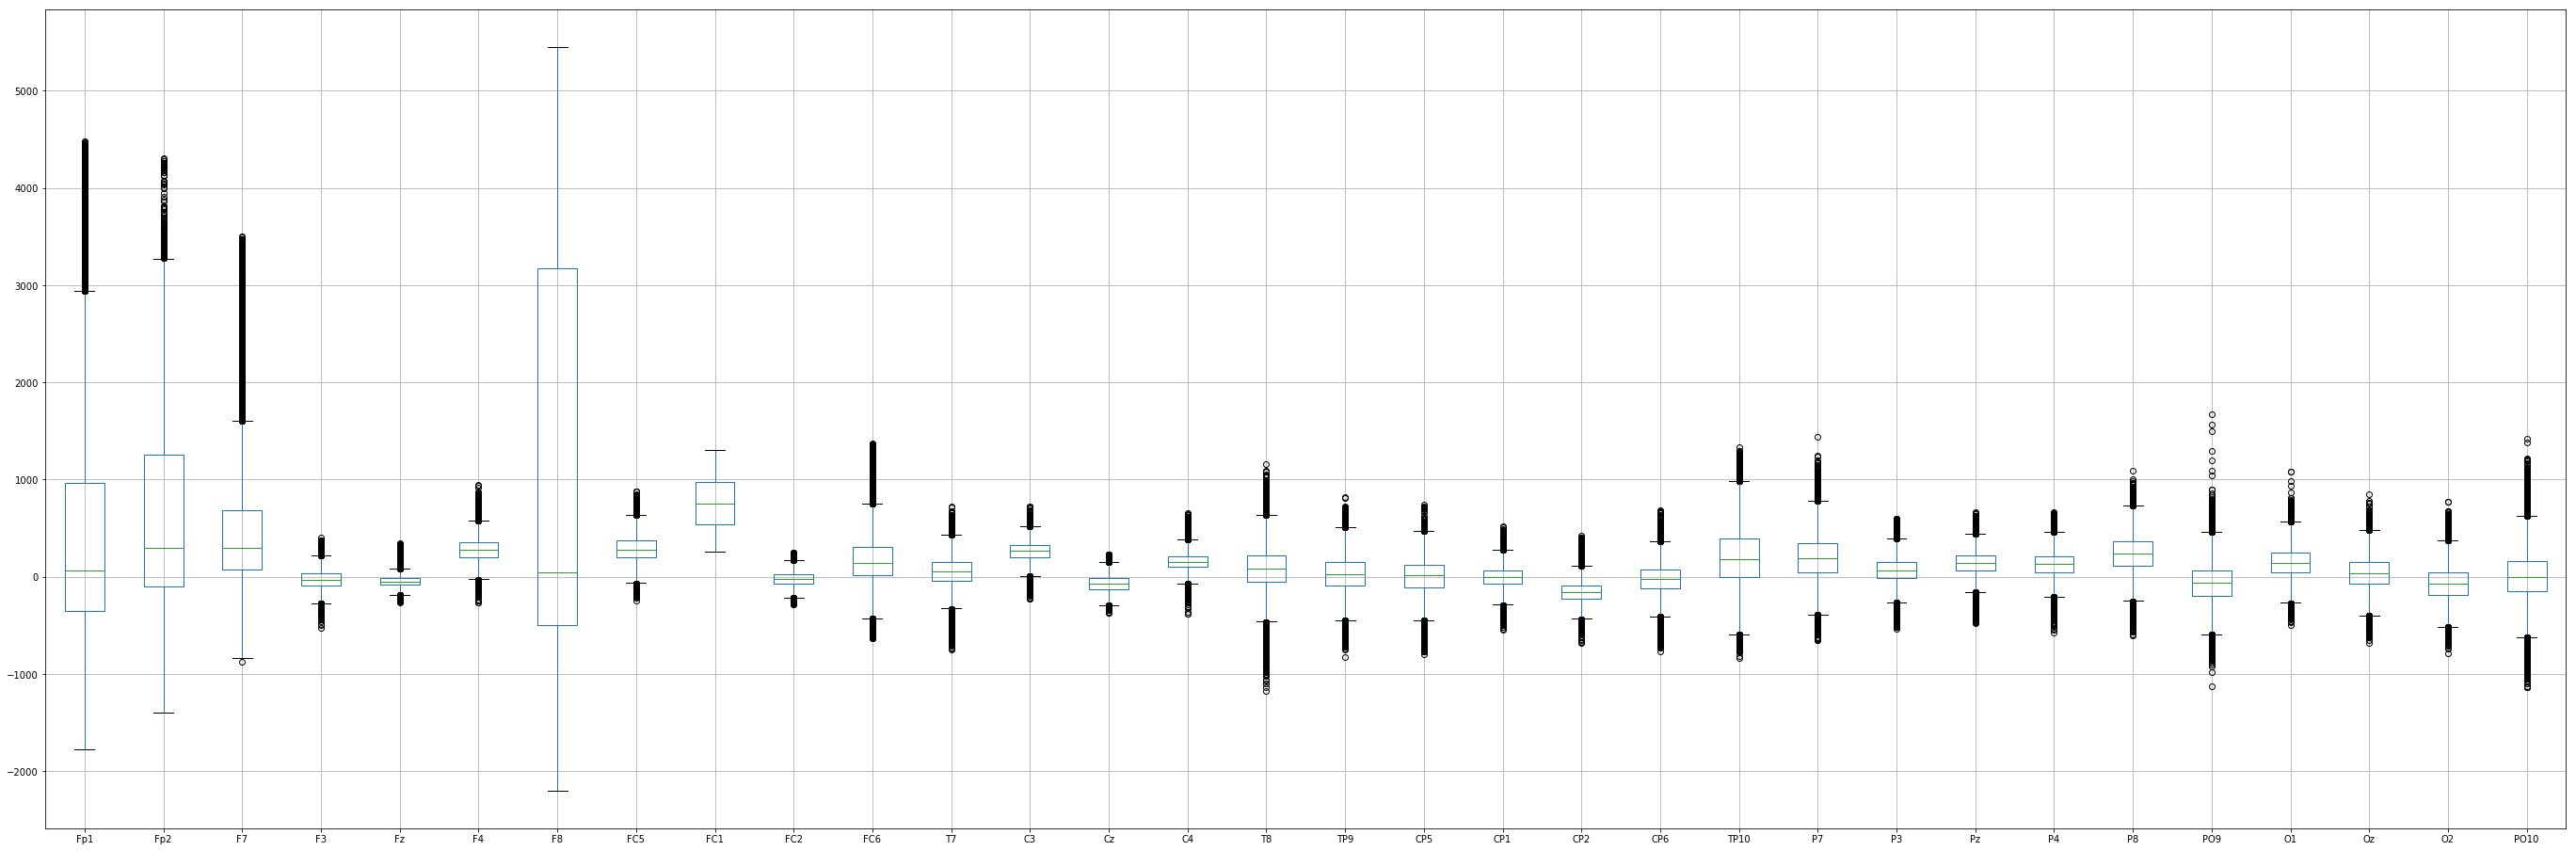

In [53]:
fig = plt.figure(figsize=(48,16))
x.boxplot()

### Feature Standardization

From the features statistics description, we see that the data is somewhat zero centered and normalized, due to the nature of the signals. Nevertheless, performing data standardization can help the model to learn faster. Data standardization centers the data around zero and normalizes it so that is has a standard deviation of one. These changes are able to improve learning for the following reasons:

- **Zero centering**: when inputs to a neural network layer are predominantly positive or negative (or, in the extreme, when they are all positive or all negative), we hurt the optimization process because we constrain weight updates to be taken in restricted directions.
- **Normalizing**: makes all features be in the same range and thus they can contribute equally to weight updates.

## Exploratory Visualization

Check the average and total series length.

In [27]:
lens = []
for x,y in data:
    lens.append(len(x))
lens = np.array(lens)

print("Average series length: {}, corresponding to {} minutes.".format(lens.mean(), lens.mean()/(500*60)))
print("Sum of all series length: {}".format(lens.sum()))

Average series length: 187351.604167, corresponding to 6.24505347222 minutes.
Sum of all series length: 17985754


Since there are on average 30 trials in each series (according to metadata), the duration of the complete trial (i.e., the completion of each of the six movements) should be roughly 6000 frames.

### Visualizing one repetition

In the figure below, we are going to plot how each label evolve over time for one repetition of the grasp-and-lift movement.

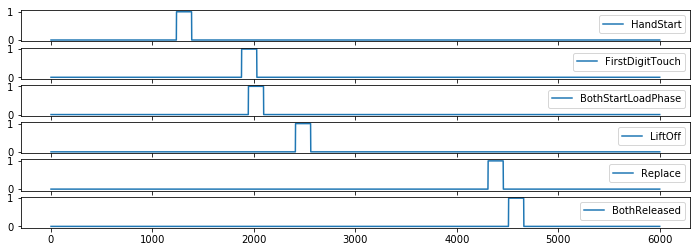

In [32]:
fig = plt.figure(figsize=(12,4))
cols = data[0][1].columns
first_ax = None

for idx,col in enumerate(cols):
    if first_ax == None:
        ax = fig.add_subplot(len(cols),1,idx+1)
        first_ax = ax
    else: 
        ax = fig.add_subplot(len(cols),1,idx+1, sharex=first_ax)
    ax.plot(data[33][1].reset_index()[col][:6000], label=col)
    ax.legend()

Experimenting with the plots above, we can see that there is some overlapping of labels, specially for the "FirstDigitTouch", "BothStartLoadPhase" and "LiftOff" labels. Therefore, we must NOT apply a softmax function at our outputs, but a sigmoid instead. In other words, it is not only a *multi-class classification* problem, but a *multi-label classification* one.

Next, we plot how the features evolve over time for the corresponding last labels plot.

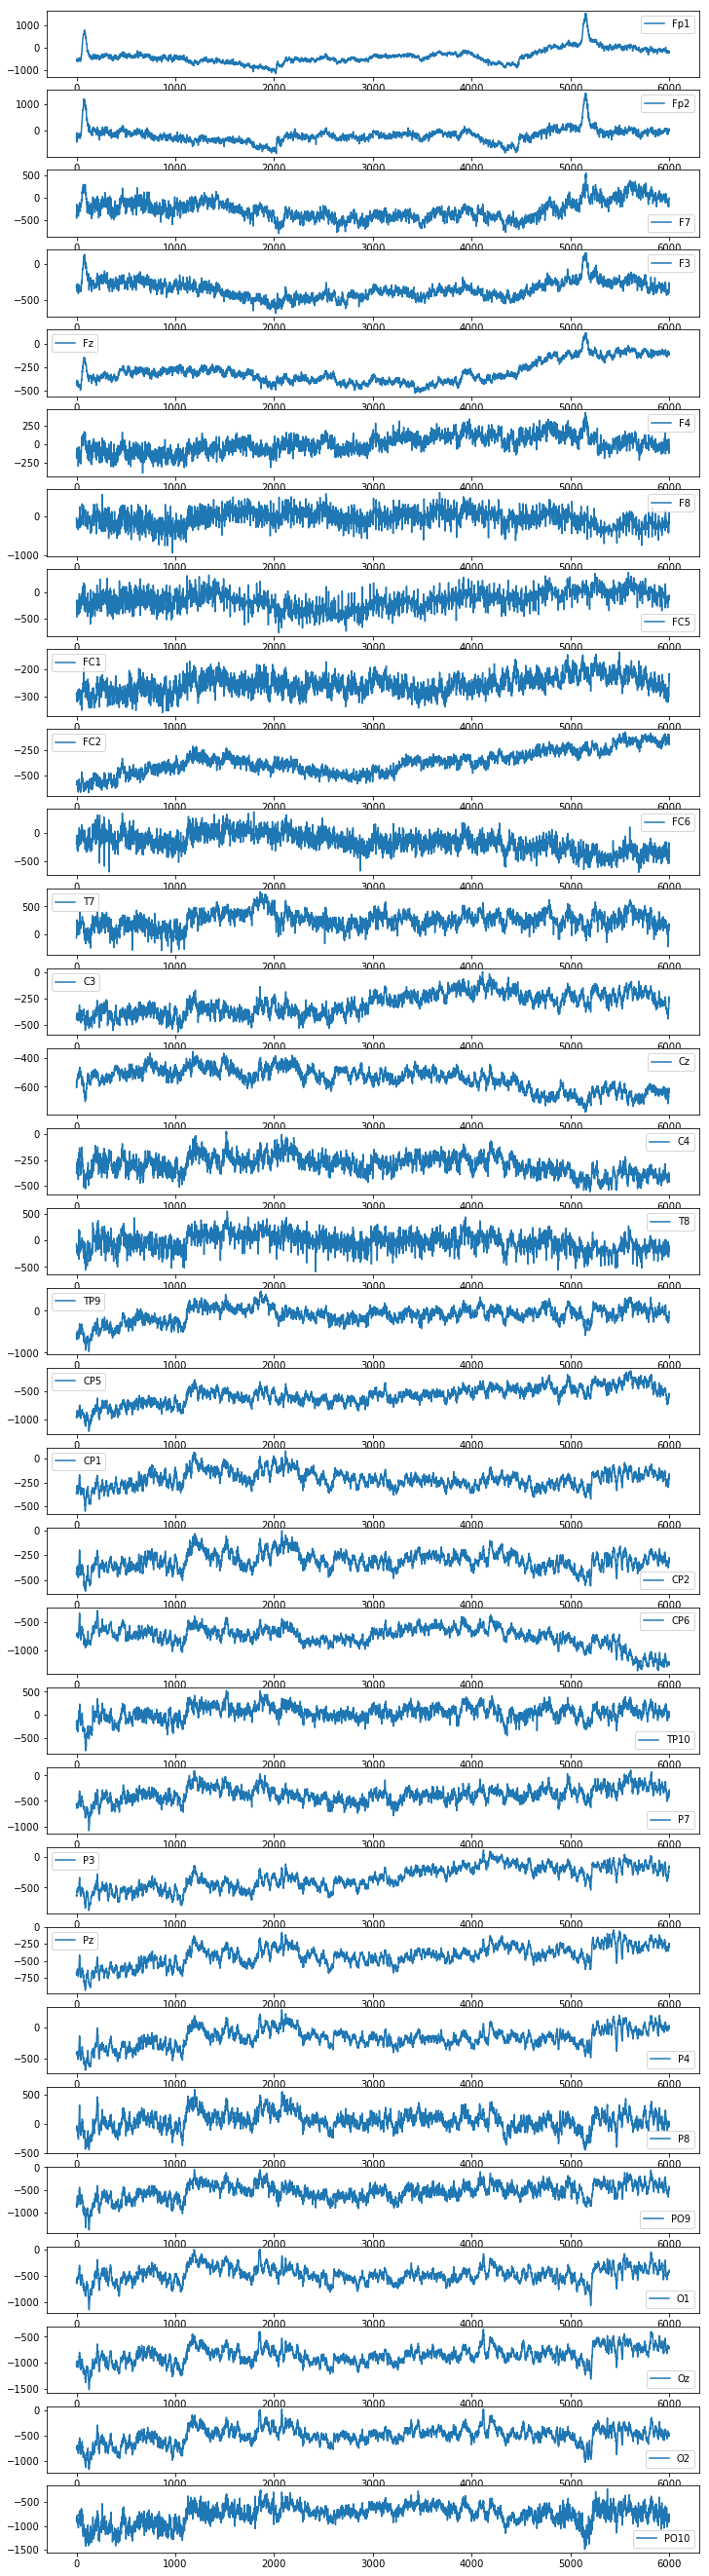

In [35]:
fig = plt.figure(figsize=(12,48))
cols = data[0][0].columns
first_ax = None

for idx,col in enumerate(cols):
    if first_ax == None:
        ax = fig.add_subplot(len(cols),1,idx+1)
        first_ax = ax
    else: 
        ax = fig.add_subplot(len(cols),1,idx+1, sharex=first_ax)
    ax.plot(data[33][0].reset_index()[col][:6000], label=col)
    ax.legend()

Following the feature plot above, we plot the distribution of feature values across all frames, for each feature and for each series.

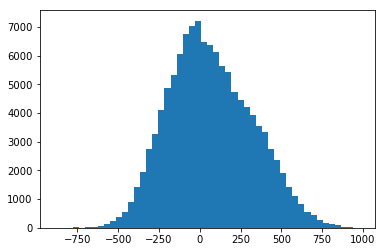

In [44]:
plt.hist(data[0][0]['O2'], bins=50)
plt.show()

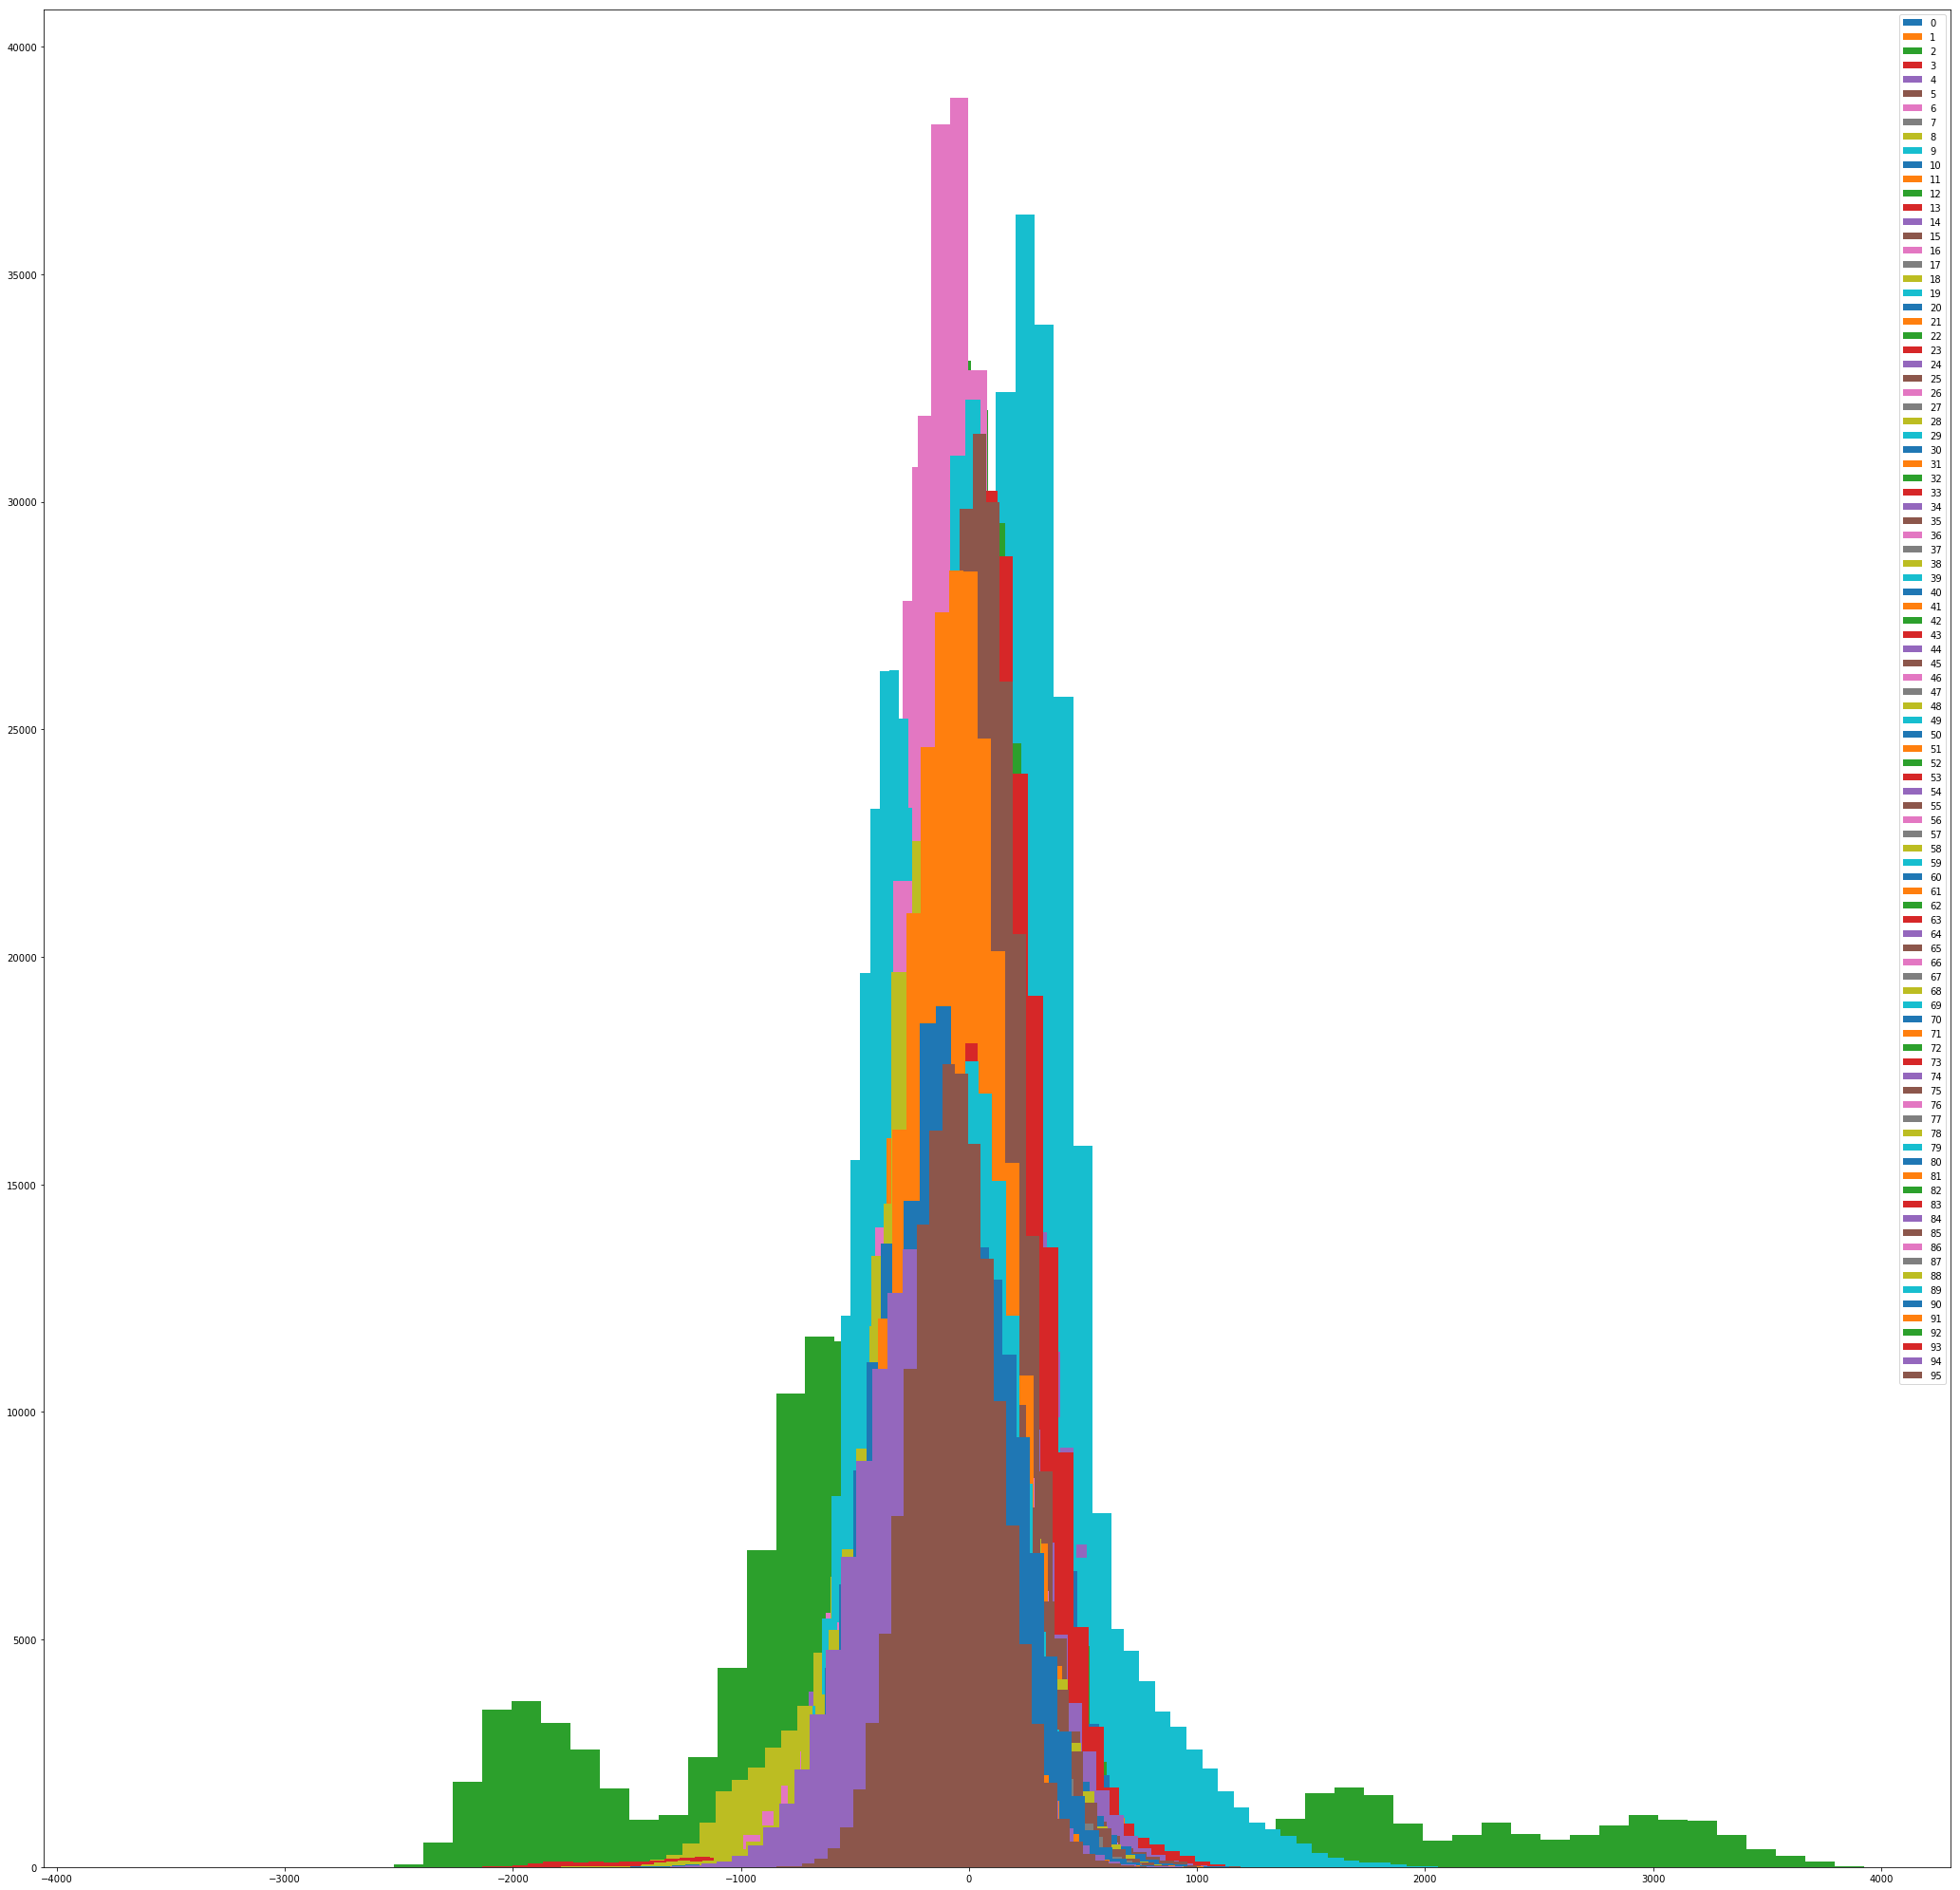

In [50]:
fig = plt.figure(figsize=(36,36))

# cols = data[0][0].columns
# for col in cols:
#     for x,_ in data:
#         plt.hist(x[col], bins=50)

col = 'PO9'
for i,(x,_) in enumerate(data):
    plt.hist(x[col], bins=50, label=str(i))
plt.legend()
plt.show()

## Verify label duration

From metadata, each label should be classified as true (have 1 in its value) in a time window of 150 frames in total, where the middle of the window corresponds to the ground truth of when the event happened. We are going to verify whether this is consistent for all series in the dataset.

In [12]:
last = {}
step_start = {}
step_duration = {}
step_count = {}
y_cols = train[0][1].columns
for col in y_cols:
    step_start[col] = 0
    step_duration[col] = 0
    step_count[col] = 0
    
for _,y in [train[0]]:
    for idx,row in y.reset_index().iterrows():
        for col in y_cols:
            if idx == 0:
                pass
            elif last[col] == 0 and row[col] == 1:
                step_start[col] = idx
            elif last[col] == 1 and row[col] == 0:
                step_duration[col] += idx - step_start[col]
                step_count[col] += 1
            last[col] = row[col]

step_avg_duration = {}
for col in y_cols:
    step_avg_duration[col] = step_duration[col] / step_count[col]

print step_avg_duration

{'HandStart': 150, 'LiftOff': 150, 'Replace': 150, 'BothStartLoadPhase': 150, 'FirstDigitTouch': 150, 'BothReleased': 150}


The duration of each step (the total amount of time each movement is active) is 150 for all series. Now that we have verified this information, we can use it to guide our search for the best window size (WS) for the neural network. A WS smaller than 150 is likely to miss important information that would help to identify an ongoing movement. WSs much bigger than that are likely to fill the model with unnecessary information (increasing variance). Thus, we expect to experiment with WSs ranging from 150 to 1500.

Besides adding variance, WSs greater than 1500 frames will use information for more than 3 seconds. Although it could still be useful to help the model identify the movement type that should occur next, in real life applications this type of behavior is not likely to be desired (it can be understood as enabling the model to capture a dataset bias --- the always repetitive movement ---, instead of really modeling the EEG signals.